 # **Part 6 - Data Visualization**
 
In this notebook, I will be focusing on the visualization of data. The data set will be presented in the form of a RDBMS. Therefore, I will be using SQL queries to extract the data.


## Objectives

In this notebook, I will perform the following:

 - Visualize the distribution of data (Histogram, Box Plot).

 - Visualize the relationship between two features (Scatter Plot, Bubble Plot).

 - Visualize composition of data (Pie Chart, Stacked Chart).

 - Visualize comparison of data (Line Chart, Bar Chart).

## Data Preparation

### _1. Installing and Importing Libraries_

In [126]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

### _2. Loading the Dataset_

In [127]:
# Loading the Stack Overflow survey dataset (cleaned) from the local path
data_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.csv'
df = pd.read_csv(data_path)

# Setting pandas option to display all columns
pd.set_option('display.max_columns', None)

# Displaying the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,2,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,2.963841e+145,HTML/CSS;JavaScript;TypeScript,Python,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,React,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+),.NET (5+),.NET (5+),Docker,Docker,Docker,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,Jira,Jira,Microsoft Teams,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,ChatGPT,I have never visited Stack Overflow or the Sta...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"No, not really",Yes,Very favorable,Increase productivity,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase,Project planning,Search for answers,Writing code,Writing code,Writing code,Writing code,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,No,Individual contributor,11.466957,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,18.581094,7.52214,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Writte

### _3. Creating a SQLite Database and Inserting the Data_

In [128]:
# Loading CSV into a DataFrame
csv_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.csv'
df = pd.read_csv(csv_path)

# Creating a new SQLite database (or connect if it already exists)
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'
conn = sqlite3.connect(db_path)

# Writing the DataFrame to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Closing the connection
conn.close()

### _4. Verifying the Data in the SQLite Database_

In [93]:
# Pathing to SQLite database
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'

# Connecting to the SQLite database
conn = sqlite3.connect(db_path)

# Running a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Displaying the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source proje

### _5. Running an SQL Query_

In [5]:
# Counting the number of rows in the table named 'main'
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


### _6. Listing All Tables_

In [6]:
# Viewing the names of all tables in the database
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


### _7. Running a Group By Query_

In [7]:
# Grouping data by a specific column (Age) to get the count of respondents in each age group
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


### _8. Describing a Table_

In [8]:
# Getting the schema of a specific table (Main)
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


##  Visualizing the Distribution of Data

### _Histogram_

Plotting a histogram of CompTotal (Total Compensation):

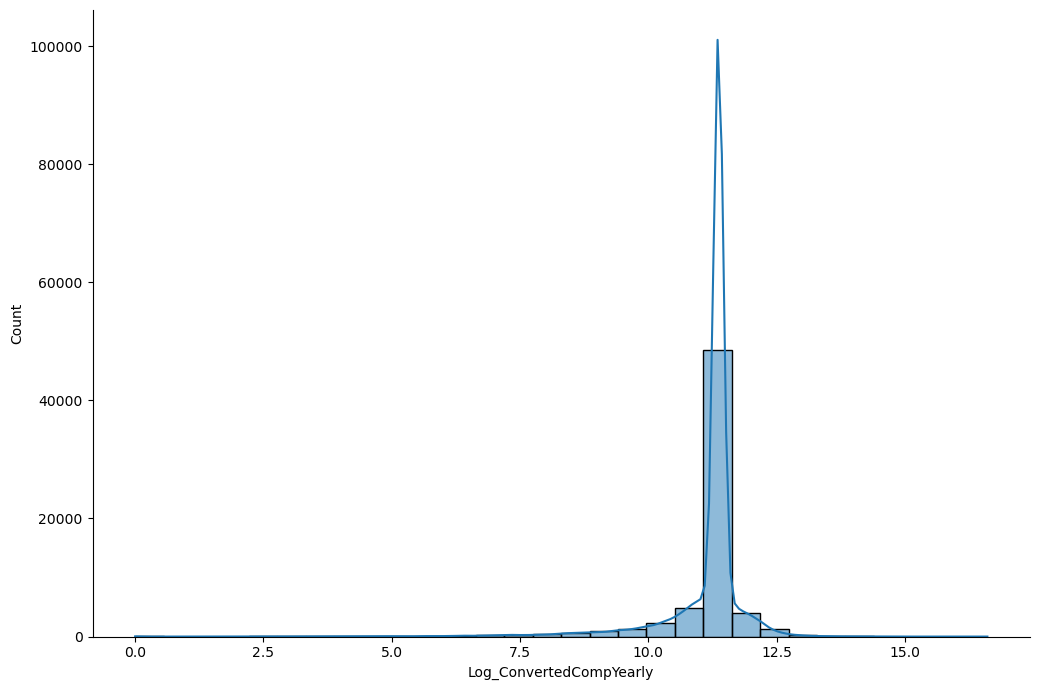

In [13]:
# Querying the data for 'ConvertedCompYearly'
QUERY = """
SELECT ConvertedCompYearly
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Applying log transformation to avoid skewness (with NaN handling)
df['Log_ConvertedCompYearly'] = df['ConvertedCompYearly'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Plotting the log-transformed data
plt.figure(figsize=(10, 6))
sns.displot(df['Log_ConvertedCompYearly'], kde=True, bins=30, height=7, aspect=1.5)

# Adding title and labels
plt.title('Log Transformation of Total Compensation', fontsize=16)
plt.xlabel('Log of Total Compensation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Showing the plot
plt.tight_layout()
plt.show()

### _Box Plot_

Plotting a box plot of Age:

In [22]:
# Querying the data for 'Age' column
QUERY = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Creating a mapping for the age ranges to numeric values
age_mapping = {
    "Under 18 years old": 17, 
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}

# Applying the mapping to the 'Age' column to create a numeric column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Checking the conversion
print(df[['Age', 'Age_numeric']].head())

                  Age  Age_numeric
0  Under 18 years old         17.0
1     35-44 years old         39.0
2     45-54 years old         49.0
3     18-24 years old         21.0
4     18-24 years old         21.0


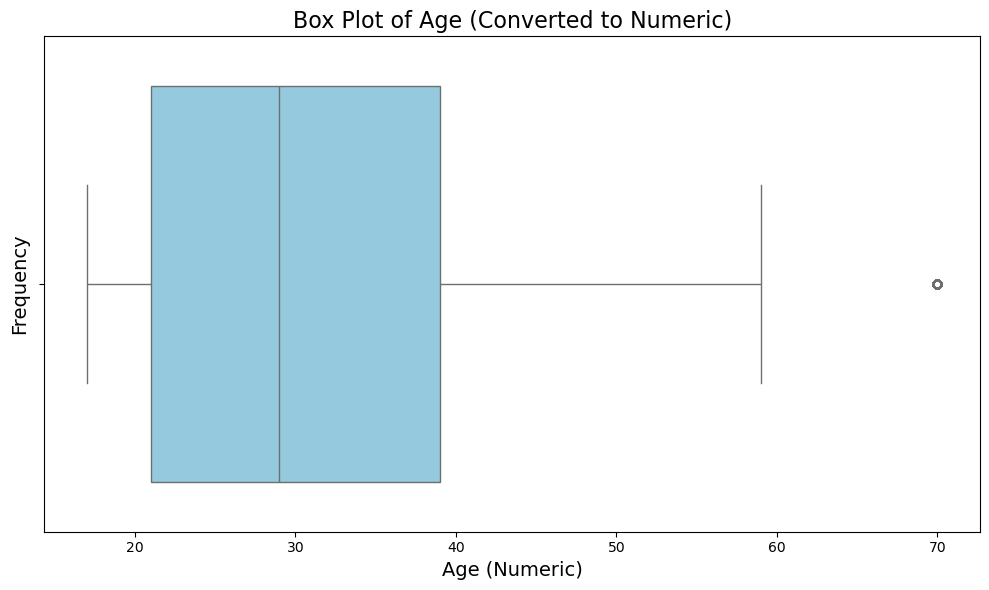

In [23]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age_numeric'], color='skyblue')

# Adding title and labels
plt.title('Box Plot of Age (Converted to Numeric)', fontsize=16)
plt.xlabel('Age (Numeric)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Visualizing Comparison of Data

### _Line Chart_

Plotting the median CompTotal for all ages from 45 to 60:

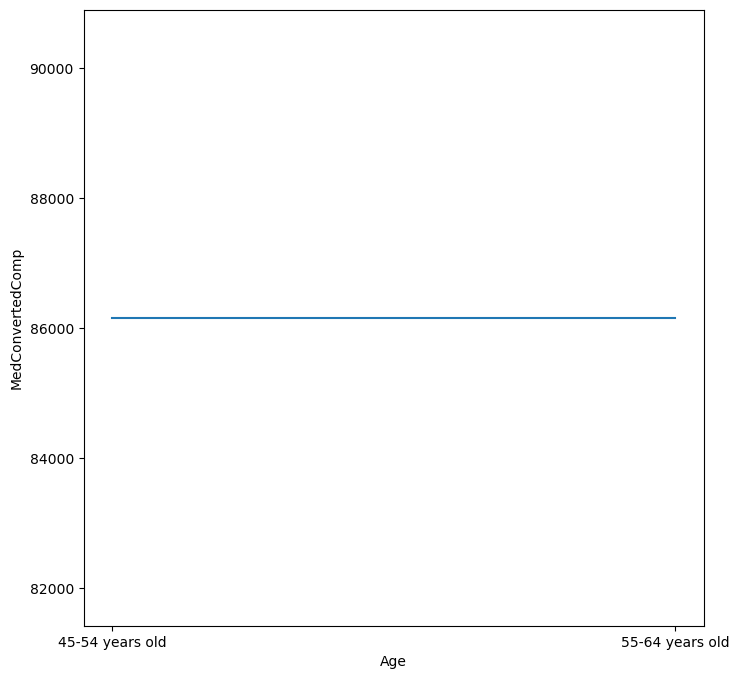

In [41]:
# Pathing to SQLite database
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'

# Connecting to the SQLite database
conn = sqlite3.connect(db_path)

# Querying to calculate the median compensation
QUERY = """
SELECT ConvertedCompYearly, Age
FROM main
WHERE Age BETWEEN 45 AND 60

"""

# Executing the query and load the result into a DataFrame
df = pd.read_sql_query(QUERY,conn)
medians = df.groupby('Age')['ConvertedCompYearly'].median()
data = pd.DataFrame(list(zip(medians.index, medians.values)),
               columns =['Age', 'MedConvertedComp'])

# Plotting the line chart
plt.rcParams['figure.figsize'] = [8,8]
sns.lineplot(data=data, x='Age', y = 'MedConvertedComp')
plt.show()

### _Bar Chart_

Creating a horizontal bar chart using the MainBranch column:

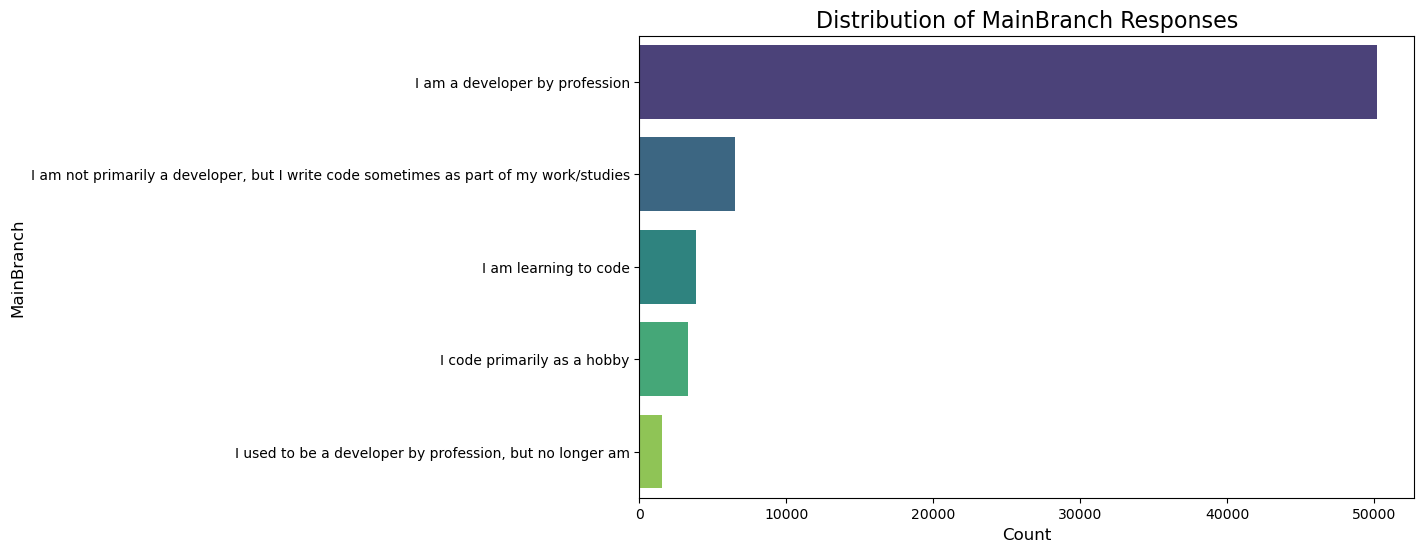

In [44]:
# Querying to group and count MainBranch values
QUERY = """
SELECT 
    MainBranch, 
    COUNT(*) AS Count
FROM main
GROUP BY MainBranch
ORDER BY Count DESC;
"""

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_branch, x='Count', y='MainBranch', hue='MainBranch', palette='viridis', dodge=False)

# Adding title and labels
plt.title('Distribution of MainBranch Responses', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('MainBranch', fontsize=12)

# Removing legend since hue is not meaningful here
plt.legend([], [], frameon=False)

# Show the plot
plt.show()

## Visualizing Relationships in Data

### _Scatter Plot_

Creating a scatter plot of Age and WorkExp:

In [50]:
# Pathing to SQLite database
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'

# Connecting to the SQLite database
conn = sqlite3.connect(db_path)

# Converting age ranges into numeric values
QUERY = """
SELECT 
    CASE 
        WHEN Age = 'Under 18 years old' THEN 17
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 29
        WHEN Age = '35-44 years old' THEN 39
        WHEN Age = '45-54 years old' THEN 49
        WHEN Age = '55-64 years old' THEN 59
        WHEN Age = '65 years or older' THEN 70
    END AS Age_numeric,
    WorkExp
FROM main
WHERE WorkExp IS NOT NULL;
"""

# Querying execution
df_plot = pd.read_sql_query(QUERY, conn)

# Closing the connection
conn.close()

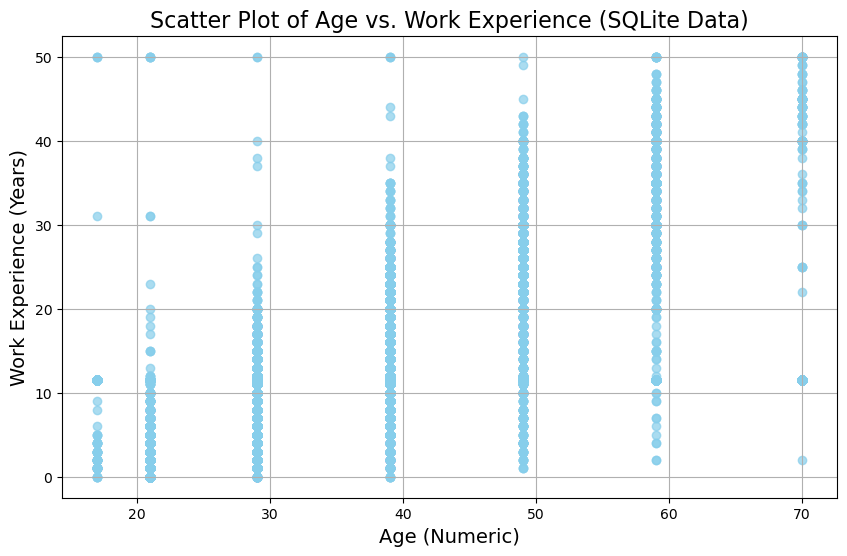

In [54]:
# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_plot['Age_numeric'], df_plot['WorkExp'], alpha=0.7, color='skyblue')

plt.title('Scatter Plot of Age vs. Work Experience (SQLite Data)', fontsize=16)
plt.xlabel('Age (Numeric)', fontsize=14)
plt.ylabel('Work Experience (Years)', fontsize=14)
plt.grid(True)
plt.show()

### _Bubble Plot_

- Visualizing the popularity of programming languages respondents have worked with (LanguageHaveWorkedWith) across age groups.

- Using bubble size to represent the frequency of each language.

In [129]:
# Pathing to SQLite database
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'

# Connecting to the SQLite database
conn = sqlite3.connect(db_path)

# Querying data to extract programming languages and age
QUERY = """
SELECT LanguageHaveWorkedWith, Age 
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND Age IS NOT NULL
LIMIT 10;
"""
df = pd.read_sql_query(QUERY, conn)
conn.close()

In [131]:
# Splitting 'LanguageHaveWorkedWith' into multiple rows
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype(str)
df_expanded = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Groupping by Language and Age to count occurrences
df_grouped = df_expanded.groupby(['Age', 'Language']).size().reset_index(name='Count')
print(df_grouped.head())

               Age    Language  Count
0  18-24 years old           C      1
1  18-24 years old         C++      2
2  18-24 years old    HTML/CSS      3
3  18-24 years old        Java      1
4  18-24 years old  JavaScript      3


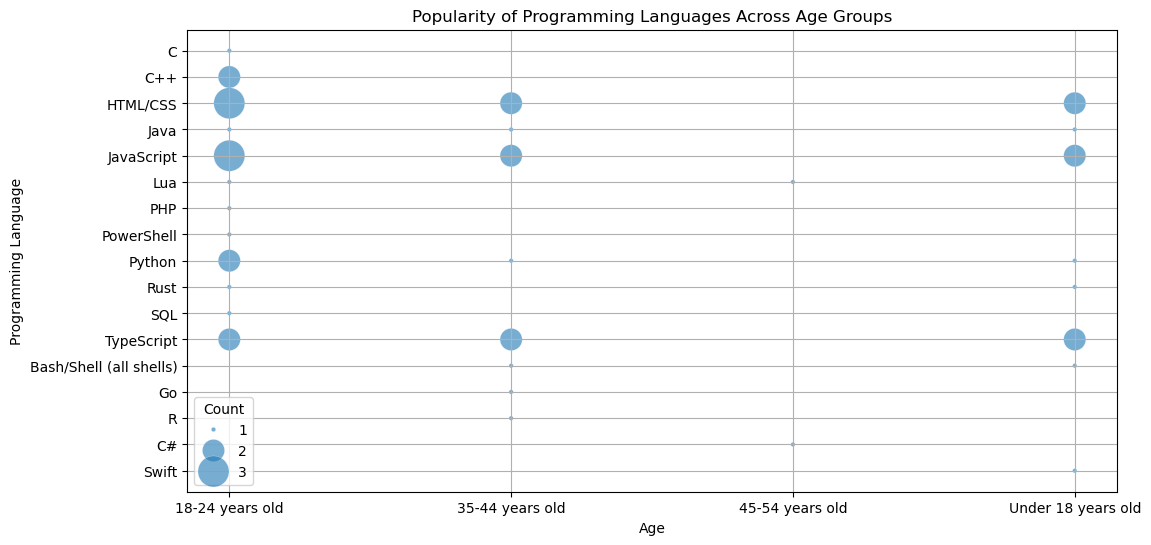

In [132]:
# Setting figure size
plt.figure(figsize=(12, 6))

# Creating bubble plot
sns.scatterplot(
    data=df_grouped,
    x='Age',
    y='Language',
    size='Count',
    sizes=(10, 500),  # Bubble size range
    alpha=0.6
)

plt.xlabel("Age")
plt.ylabel("Programming Language")
plt.title("Popularity of Programming Languages Across Age Groups")
plt.grid(True)

plt.show()

## Visualizing Composition of Data

### _Pie Chart_

Creating a pie chart of the top 5 databases(DatabaseWantToWorkWith) that respondents wish to learn next year:

In [91]:
# Pathing to SQLite database
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'

# Connecting to the SQLite database
conn = sqlite3.connect(db_path)

# SQL querying to get the top 5 databases
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY Count DESC
LIMIT 5;
"""

# Loading query results into a DataFrame
df_top5 = pd.read_sql_query(QUERY, conn)

# Closing the connection
conn.close()

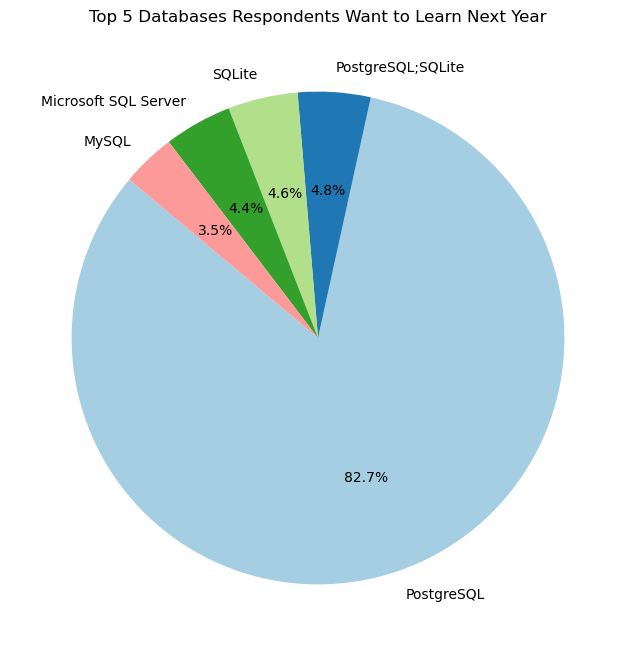

In [92]:
# Creating a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df_top5["Count"], labels=df_top5["DatabaseWantToWorkWith"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Databases Respondents Want to Learn Next Year")

plt.show()

### _Stacked Chart_

Creating a stacked bar chart of median TimeSearching and TimeAnswering for the age group 30 to 35:

In [121]:
# Pathing to SQLite database
db_path = r'C:\Users\denni\Desktop\IBM Data Analyst\8_IBM Capstone Project\cleaned_dataset.db'

# Connecting to the SQLite database
conn = sqlite3.connect(db_path)

# Defining the query to select the needed columns
QUERY = """
SELECT CodingActivities, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE CodingActivities IS NOT NULL
"""

# Querying the data
df = pd.read_sql_query(QUERY, conn)

# Stripping any extra spaces from the columns
df.columns = df.columns.str.strip()

# Grouping by 'CodingActivities' and summing 'JobSatPoints_6' and 'JobSatPoints_7'
df_grouped = df.groupby('CodingActivities')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

# Sorting to get the top N 'CodingActivities' with the highest sum of job satisfaction points
top_n = 10
df_top_n = df_grouped.sort_values(by=['JobSatPoints_6', 'JobSatPoints_7'], ascending=False).head(top_n)

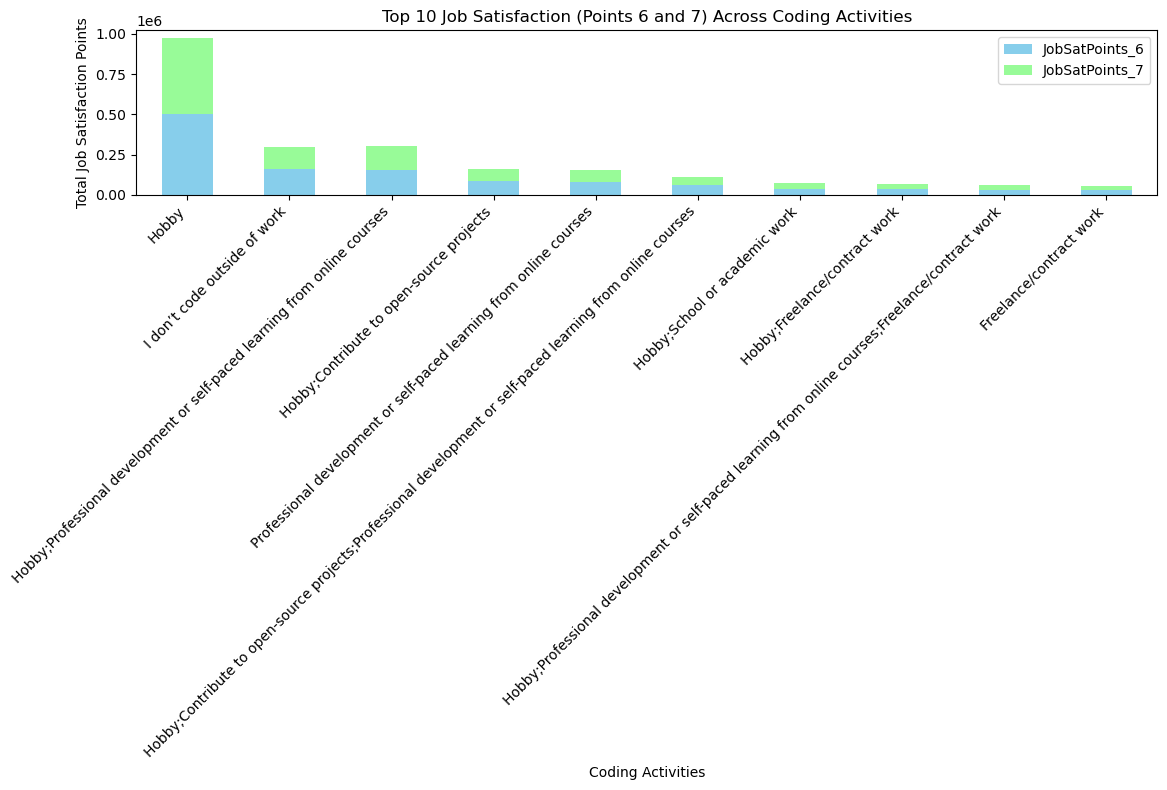

In [125]:
# Defining custom colormap (sky blue to light green)
from matplotlib.colors import ListedColormap
colors = ['#87CEEB', '#98FB98']  # Sky blue and light green
cmap = ListedColormap(colors)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size
df_top_n.plot(kind="bar", stacked=True, colormap=cmap, ax=ax)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotating the labels and aligning them to the right

# Adding labels and title
plt.xlabel("Coding Activities")
plt.ylabel("Total Job Satisfaction Points")
plt.title(f"Top {top_n} Job Satisfaction (Points 6 and 7) Across Coding Activities")

# Tight layout to avoid label clipping
plt.tight_layout()

# Displaying the plot
plt.show()

# Closing the connection
conn.close()

Copyright © IBM Corporation. All rights reserved.